Перед нами данные о заказах такси в Перу
* journey_id – уникальный id поездки
* user_id – id пользователя
* driver_id – id водителя
* taxi_id – id машины
* icon – тип поездки
* start_type – тип заказа (asap - подача машины как можно скорее, reserved - к определенному времени, delayed - машина приехала с задержкой)
* start_at – время начала поездки
* start_lat – исходное местоположение пользователя, широта
* start_lon – исходное местоположение пользователя, долгота
* end_at – время окончания поездки
* end_lat – итоговое местоположение, широта
* end_lon – итоговое местоположение, долгота
* end_state – состояние заказа
* driver_start_lat – исходное местоположение водителя, широта
* driver_start_lon – исходное местоположение водителя, долгота
* arrived_at – время прибытия водителя
* source – платформа, с которой сделан заказ
* driver_score – оценка водителя клиентом
* rider_score – оценка клиента водителем

На примере данных о заказах такси в Перу рассмотрим как выявить самую популярную платформу для заказа такси, распределение и посчитаем частоту встречаемости каждой оценки от клиентам водителям, и от водителей клиентам, распределение заказов по месяцам и дням недели, посчитаем активность пользователей метрике MAU.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Ale\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#данные, которые содержат информацию о времени и дате переведем в формат даты
taxi=pd.read_csv ('taxi_peru.csv', sep=';', parse_dates= ['start_at', 'end_at', 'arrived_at']) 
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Проверим, с какой платформы было сделано больше всего заказов

In [3]:
taxi.source.value_counts()[[0]]

iPhone    9741
Name: source, dtype: int64

Проверим, как распределены оценки водителей 

In [6]:
#посчитаем частоту встречаемости каждой из оценок в процентном соотношении
driver_score_counts = taxi.driver_score.value_counts(normalize = True)\
.mul(100)\
.round(2)\
.reset_index()\
.rename(columns={'index':'driver_score', 'driver_score': 'percentage'})\
.sort_values('driver_score') 
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


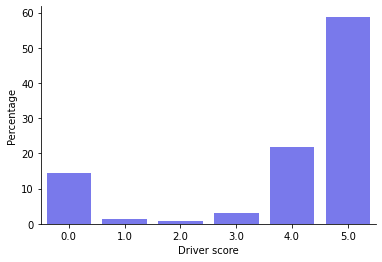

In [7]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.6)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убираем часть рамки графика
plt.show()

Можно заметить, чаще всего клиенты ставят оценку 5, а реже оценку 2.

In [63]:
print('Количество пропущенных значений:',taxi.driver_score.isna().sum(), 'Всего значений:', taxi.shape[0])

Количество пропущенных значений: 15461 Всего значений: 23111


Судя по большому количеству пропущенных значений в колонке driver_score можно сделать вывод, что зачастую клиенты пропускают опцию поставить оценку водителю.

Аналогично проверим распределение оценок клиентов

In [64]:
#посчитаем частоту встречаемости каждой из оценок в процентном соотношении
rider_score_counts = taxi.rider_score.value_counts(normalize = True)\
.mul(100)\
.round(2)\
.reset_index()\
.rename(columns={'index':'rider_score', 'rider_score': 'percentage'})\
.sort_values('rider_score') 
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


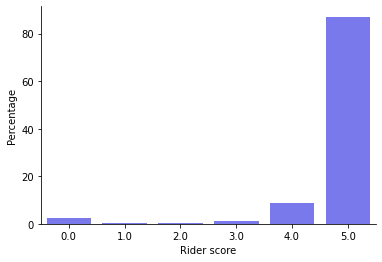

In [56]:
ax1 = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.6)
ax1.set(xlabel='Rider score', ylabel='Percentage') 
sns.despine() 
plt.show()

In [65]:
print('Количество пролпущенных значений:',taxi.rider_score.isna().sum(), 'Всего значений:', taxi.shape[0])

Количество пролпущенных значений: 7721 Всего значений: 23111


Водители такси тоже чаще всего ставят оценку 5, реже оценку 2. Но водители примерно в 2 раза чаще ставят оценку клиентам, чем клиенты водителям.

Посмотрим на динамику заказов по месяцам и по неделям. 

In [66]:
#Добавим столбец month, где будет храниться месяц, в котором был сделан заказ, и столбец weekday – название дня недели
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.strftime('%A') #strftime форматирует метод в строку, %A - обращение ко дню недели
taxi[['month', 'weekday']].head()

,month,weekday
0,11,Tuesday
1,6,Tuesday
2,5,Monday
3,6,Tuesday
4,9,Saturday


C:\Users\Ale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Динамика заказов по месяцам')

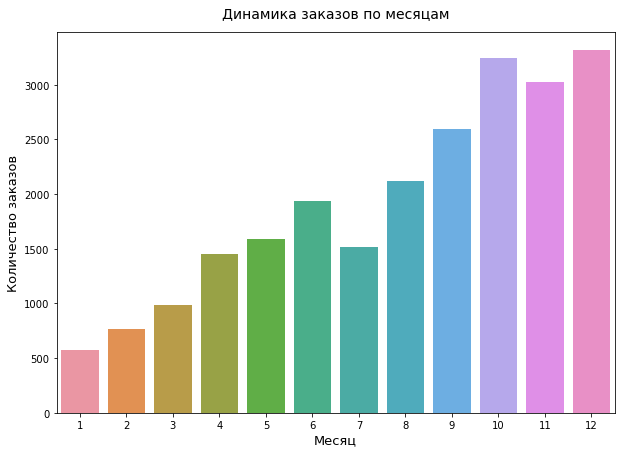

In [59]:
plt.figure(figsize=(10,7))
sns.countplot(taxi.month)
plt.xlabel('Месяц', fontsize=13)
plt.ylabel('Количество заказов', fontsize=13)
plt.title('Динамика заказов по месяцам', 
          fontsize=14,  
          pad='15')

По грфику можно увидеть, что количество заказов возрастает к концу года, это может быть связано с тем, что данная служба такси была запущена в начале года либо в конце прошлого и постепенно набирает популярность с каждым месяцем. На графике есть 2 точки убывания по количеству заказов в месяц, это июль и ноябрь. В эти месяца популярность нескольео падает, по сравнению с предыдущим месяцем.

C:\Users\Ale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Динамика заказов по неделям')

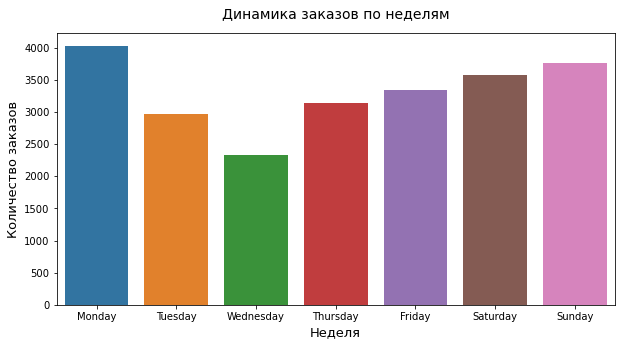

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(taxi.weekday, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Неделя', fontsize=13)
plt.ylabel('Количество заказов', fontsize=13)
plt.title('Динамика заказов по неделям', 
          fontsize=14,  
          pad='15')

По данного графику делаем вывод, что среда является самым непопулярным днем недели по количеству заказов, а самым популярным - понедельник.

Посмотрим на метрику MAU (monthly active users), показывающую число уникальных пользователей за месяц.
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за месяц.

In [67]:
#посмотрим каково уникальное количество пользователей в каждом месяце
m_active_users = taxi.groupby('month').agg({'user_id':pd.Series.nunique})
m_active_users 

,user_id
month,
1,102
2,111
3,163
4,254
5,275
6,309
7,318
8,377
9,416


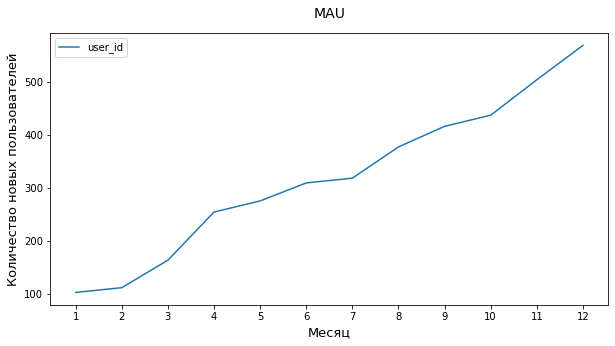

In [62]:
xticks=range(1,13,1) #задаем количество месяцев и шаг

plt.figure(figsize=(10,5))
sns.lineplot(data=m_active_users)
plt.xticks(xticks)
plt.xlabel('Месяц', fontsize=13)
plt.ylabel('Количество новых пользователей', fontsize=13)
plt.title('MAU', 
          fontsize=14,
         pad='15')
plt.show()

По графику видим, что MAU постоянно возрастает.